In [1]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data
%matplotlib inline
import sys
import os
sys.path.append(os.path.expanduser('~/dea-notebooks/10_Scripts/'))
import SpatialTools
import DEADataHandling

In [2]:
dc = Datacube(config='/g/data/u46/users/dra547/modis_oc.conf')

In [3]:
dc.list_products()

,name,description,product_type,instrument,lon,lat,time,platform,format,creation_time,label,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
1,modis_oc_1d,MODIS Ocean Cover Daily,modis_oc_1d,None,None,None,None,MODIS,None,None,None,EPSG:4326,"[-0.01, 0.01]",None,"(latitude, longitude)"


In [4]:
dc.list_measurements()

dtype                 name  nodata  \
product     measurement                                                 
modis_oc_1d K_490                float32                K_490  -999.0   
            chl_gsm              float32              chl_gsm  -999.0   
            chl_oc3              float32              chl_oc3  -999.0   
            dt                   float32                   dt  -999.0   
            ipar                 float32                 ipar  -999.0   
            l2_flags               int32             l2_flags    -1.0   
            nanop_brewin2010at   float32   nanop_brewin2010at  -999.0   
            nanop_brewin2012in   float32   nanop_brewin2012in  -999.0   
            npp_vgpm_eppley_gsm  float32  npp_vgpm_eppley_gsm  -999.0   
            npp_vgpm_eppley_oc3  float32  npp_vgpm_eppley_oc3  -999.0   
            owtd                    int8                 owtd    -1.0   
            par                  float32                  par  -999.0   
            picop_brewin2010at   float32   picop_brewin2010at  -999.0   
            picop_brewin2012in   float32   picop_brewin2012in  -999.0   
            sst                  float32                  sst  -999.0   
            sst_quality            int16          sst_quality    -1.0   

                                                          units  
product     measurement                                          
modis_oc_1d K_490                                          m^-1  
            chl_gsm                                      mg/m^3  
            chl_oc3                                      mg/m^3  
            dt                   days since 2016-01-01 00:00:00  
            ipar                                  Ein m^-2 s^-1  
            l2_flags                                          1  
            nanop_brewin2010at                          percent  
            nanop_brewin2012in                          percent  
            npp_vgpm_eppley_gsm                    mg.m^-3.d^-1  
            npp_vgpm_eppley_oc3                    mg.m^-3.d^-1  
            owtd                                              1  
            par                                 Ein m^-2 day^-1  
            picop_brewin2010at                          percent  
            picop_brewin2012in                          percent  
            sst                                         Celsius  
            sst_quality                                       1

In [3]:
data = dc.load(product='modis_oc_1d', time=('2016-01-01', '2016-01-15'), resolution=(-0.1, 0.1), measurements=('sst',))

In [4]:
data = mask_invalid_data(data)

In [5]:
data

<xarray.Dataset>
Dimensions:    (latitude: 701, longitude: 1001, time: 15)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999 ...
  * latitude   (latitude) float64 10.05 9.95 9.85 9.75 9.65 9.55 9.45 9.35 ...
  * longitude  (longitude) float64 79.95 80.05 80.15 80.25 80.35 80.45 80.55 ...
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan nan nan nan ...
Attributes:
    crs:      EPSG:4326

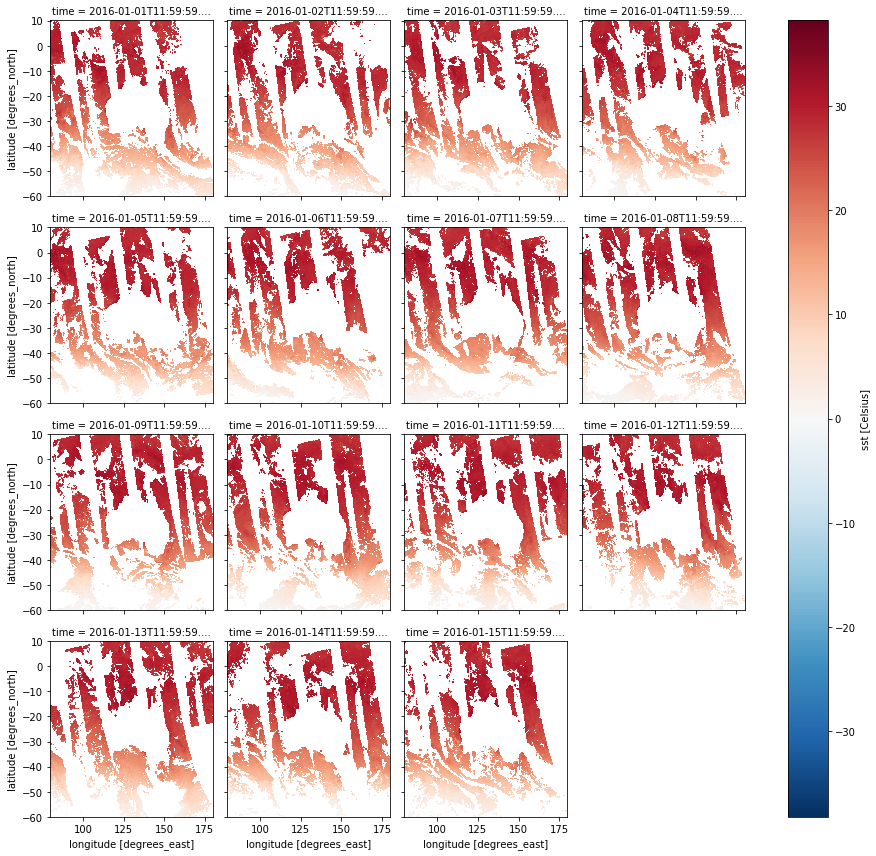

In [6]:

data.sst.plot(col='time',col_wrap=4)


In [8]:
data2 = data.resample(time='5D').mean()

In [9]:
data2

<xarray.Dataset>
Dimensions:    (latitude: 701, longitude: 1001, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999 ...
  * latitude   (latitude) float64 10.05 9.95 9.85 9.75 9.65 9.55 9.45 9.35 ...
  * longitude  (longitude) float64 79.95 80.05 80.15 80.25 80.35 80.45 80.55 ...
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan nan nan nan ...

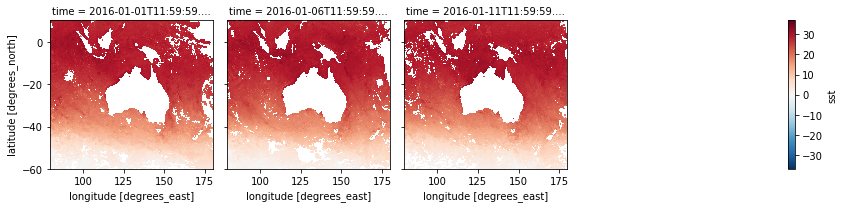

In [10]:
data2.sst.plot(col='time',col_wrap=4)

In [11]:
time_series = dc.load(product='modis_oc_1d', lat=-20, lon=153, measurements=['sst'])

In [12]:
time_series = mask_invalid_data(time_series)

In [13]:
time_series

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 1459)
Coordinates:
  * time       (time) datetime64[ns] 2013-01-01T11:59:59.999999 ...
  * latitude   (latitude) float64 -20.0
  * longitude  (longitude) float64 153.0
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan nan nan nan ...
Attributes:
    crs:      EPSG:4326

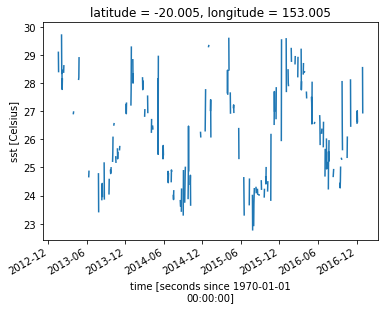

In [14]:
time_series.sst.plot()

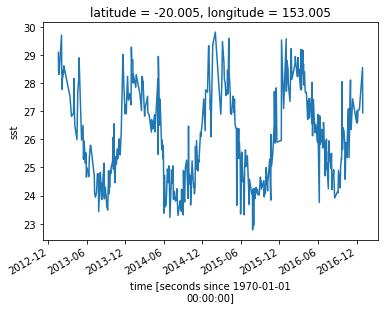

In [15]:
time_series.interpolate_na(dim='time').sst.plot()

In [19]:
data2.isel(time=2)

<xarray.Dataset>
Dimensions:    (latitude: 701, longitude: 1001)
Coordinates:
    time       datetime64[ns] 2016-01-11T11:59:59.999999
  * latitude   (latitude) float64 10.05 9.95 9.85 9.75 9.65 9.55 9.45 9.35 ...
  * longitude  (longitude) float64 79.95 80.05 80.15 80.25 80.35 80.45 80.55 ...
Data variables:
    sst        (latitude, longitude) float32 nan nan nan nan nan nan nan nan ...

In [48]:
sst3_tpi = SpatialTools.calculte_tpi(data2.isel(time=2).sst,neighborhood='Circle',radius=10)

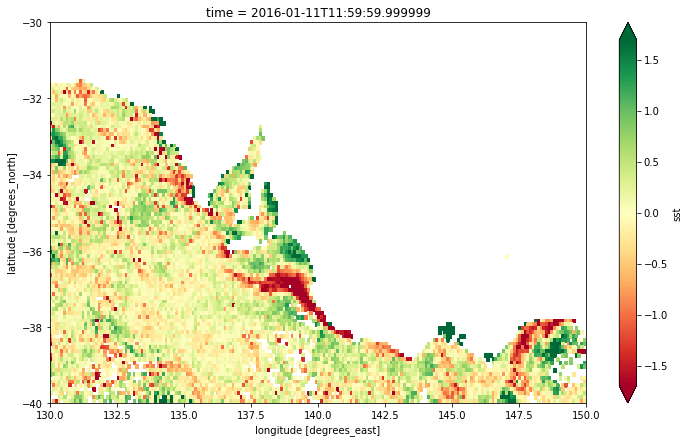

In [82]:
sst3_tpi.loc[-30:-40,130:150].plot(figsize=(12,7),cmap='RdYlGn',robust=True)

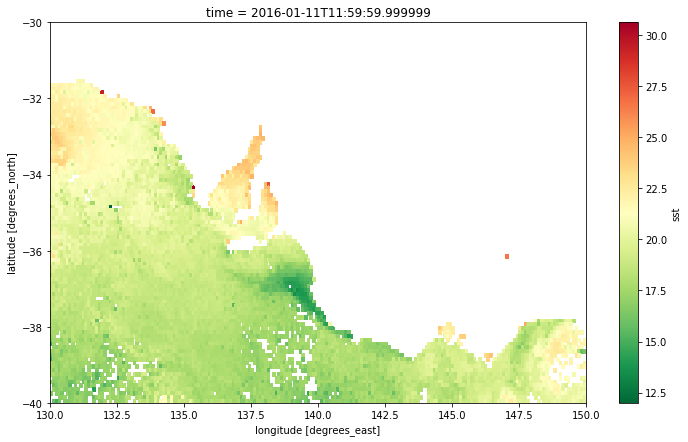

In [84]:
data2.isel(time=2).sst.loc[-30:-40,130:150].plot(figsize=(12,7),cmap='RdYlGn_r')

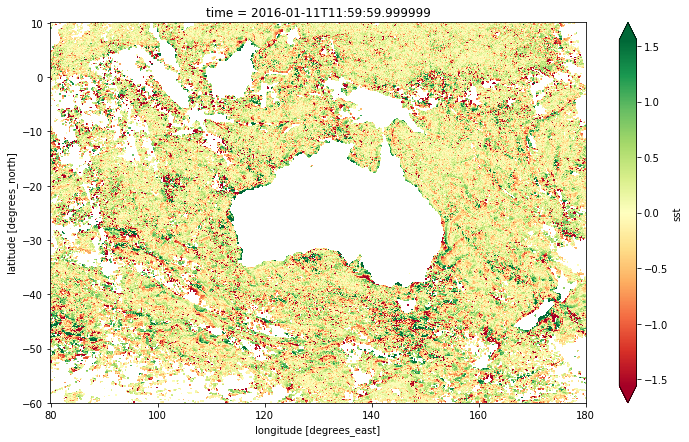

In [89]:
sst3_tpi.plot(figsize=(12,7),cmap='RdYlGn',robust=True)

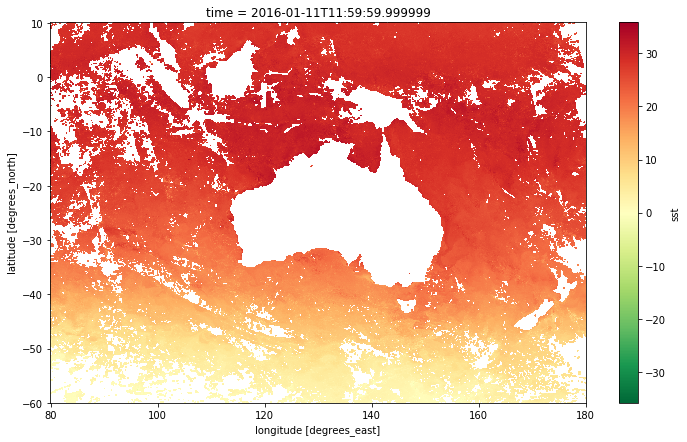

In [91]:
data2.isel(time=2).sst.plot(figsize=(12,7),cmap='RdYlGn_r')